In [3]:
library(gapminder)
library(dplyr)
library(ggplot2)

In [4]:
head(gapminder)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [5]:
#Mutating with an additional life expectancy in months
gapminder <- gapminder %>%
    mutate (lifeExpMonths = 12 * lifeExp)

In [6]:
# Top 5 Countries with highest life expectancy in 2017
highest_expectancy_countries <- gapminder %>% 
    filter (year == 2007) %>%
    mutate (lifeExpMonths = 12 * lifeExp) %>% 
    arrange (desc(lifeExpMonths))
head(highest_expectancy_countries, 5)

country,continent,year,lifeExp,pop,gdpPercap,lifeExpMonths
Japan,Asia,2007,82.603,127467972,31656.07,991.236
"Hong Kong, China",Asia,2007,82.208,6980412,39724.98,986.496
Iceland,Europe,2007,81.757,301931,36180.79,981.084
Switzerland,Europe,2007,81.701,7554661,37506.42,980.412
Australia,Oceania,2007,81.235,20434176,34435.37,974.820


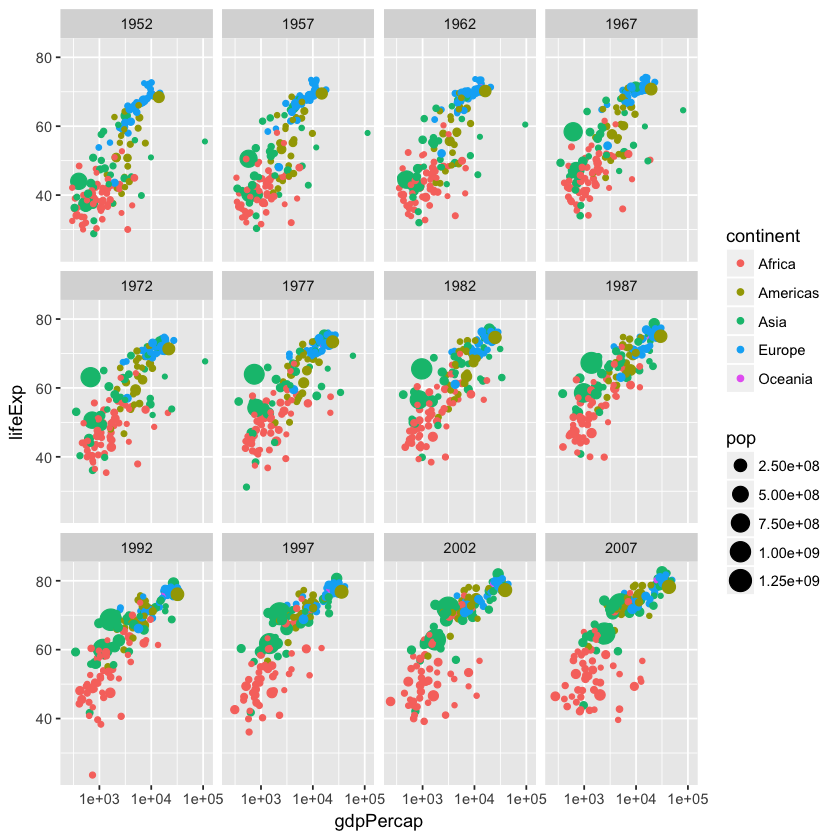

In [7]:
#Sub-graph for each year faceted on the continents
ggplot(gapminder, aes(x=gdpPercap, y=lifeExp, color=continent, size=pop)) + geom_point() + 
    scale_x_log10() + facet_wrap(~ year)

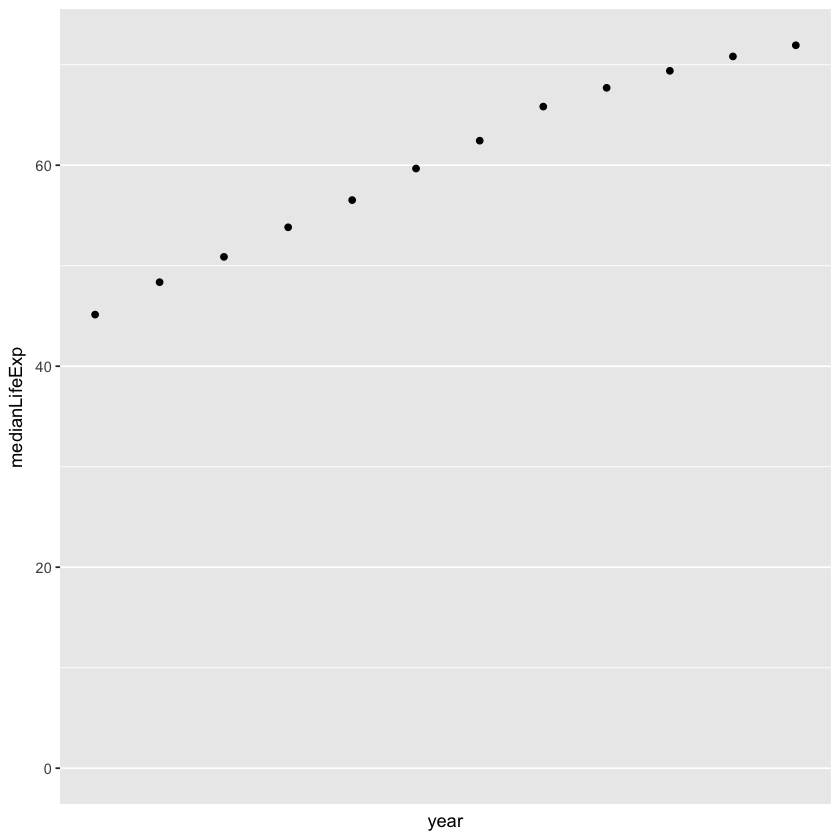

In [8]:
#Median Life Expectancy
median_life_expectancy <- gapminder %>%
  group_by(year) %>%
  summarize(medianLifeExp = median(lifeExp), maxGdpPercap = max(gdpPercap))
ggplot (median_life_expectancy, aes (x=year, y=medianLifeExp)) + geom_point() + scale_x_log10() + expand_limits(y=0)

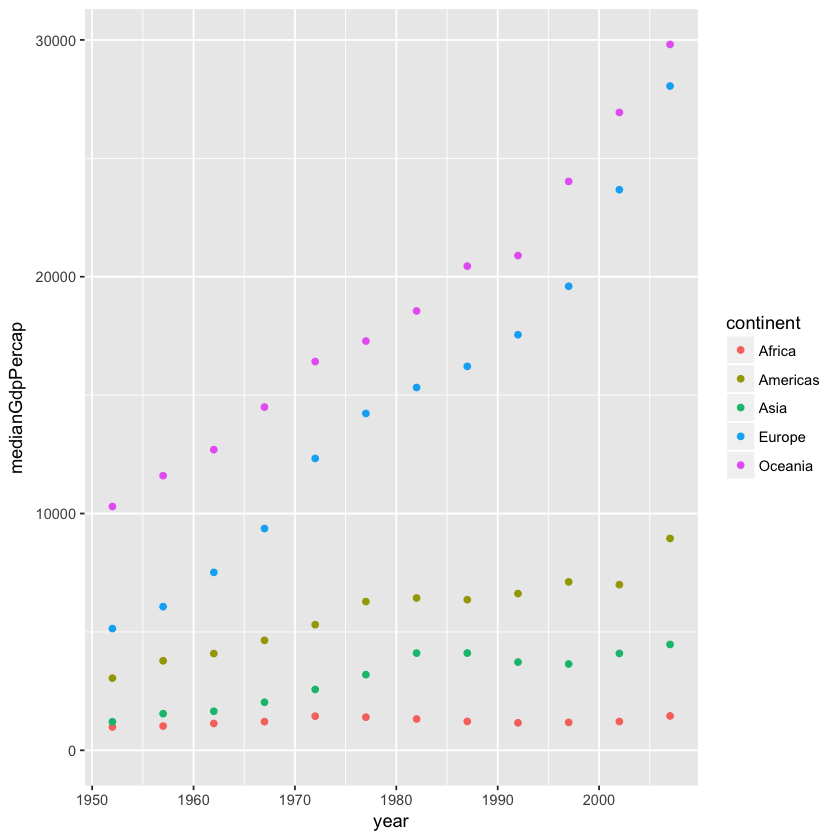

In [9]:
#Visualizing median GDP per capita per continent over time
median_gdp_continent_year <- gapminder %>% 
  group_by (continent, year) %>% 
  summarize (medianGdpPercap = median(gdpPercap))

# Plot the change in medianGdpPercap in each continent over time
ggplot(median_gdp_continent_year, aes (x=year, y=medianGdpPercap, 
  color = continent)) + 
  geom_point() + 
  expand_limits(y=0)

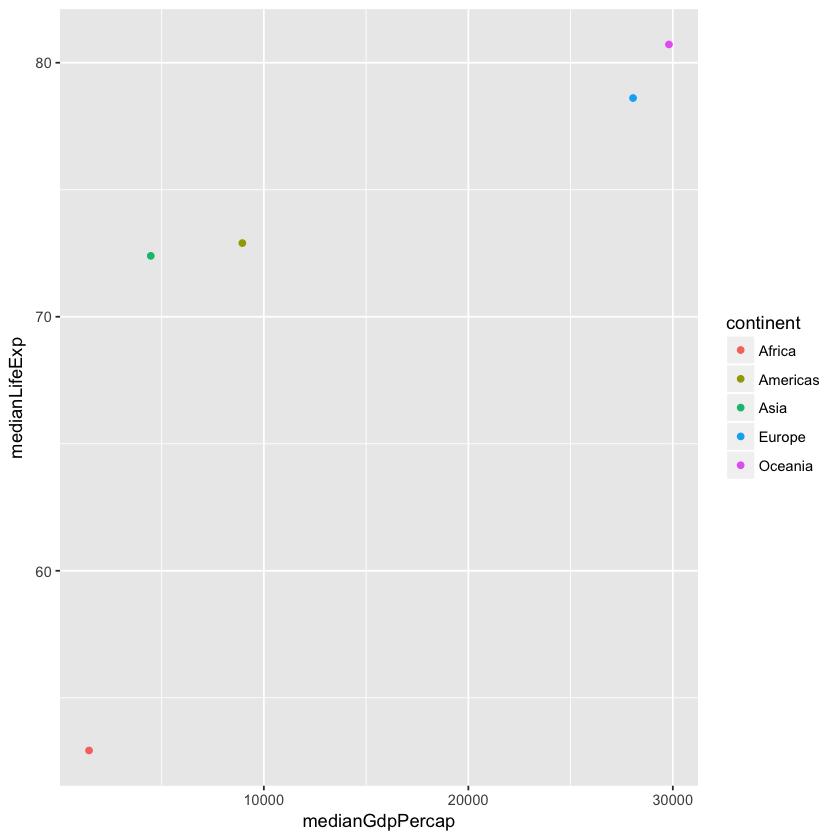

In [10]:
#Comparing median life expectancy and median GDP per continent in 2007
per_continent_2007 <- gapminder %>% 
  filter (year == 2007) %>% 
  group_by (continent) %>% 
  summarize (medianLifeExp = median(lifeExp), 
  medianGdpPercap = median(gdpPercap))

# Use a scatter plot to compare the median GDP and median life expectancy
ggplot (per_continent_2007, aes(x=medianGdpPercap, y=medianLifeExp, color=continent)) + geom_point()

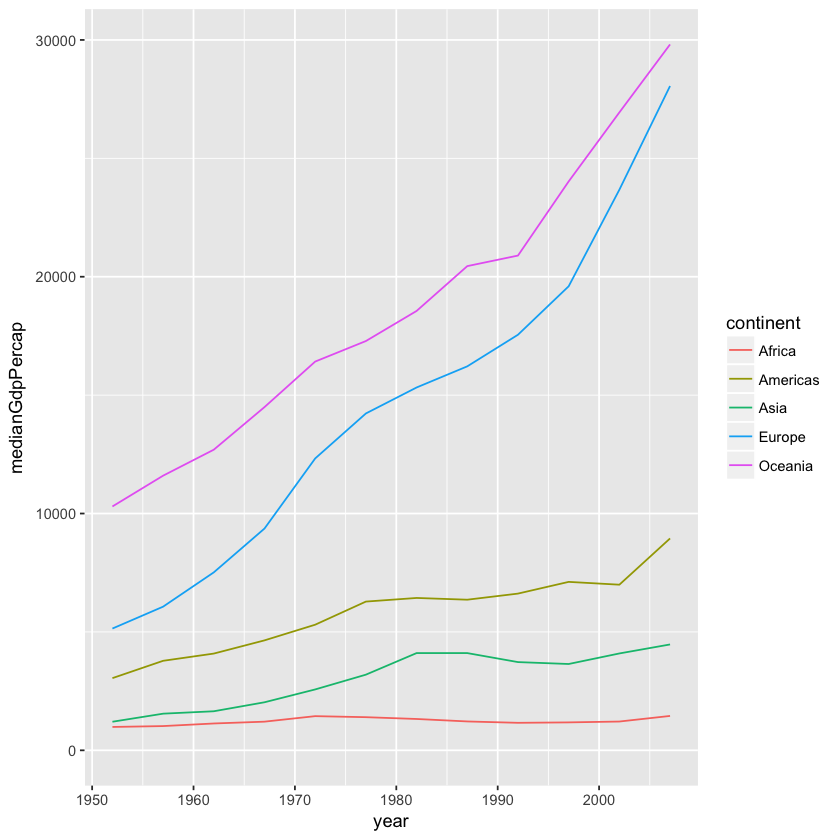

In [11]:
#Visualizing median GDP per capita over time
by_year_continent <- gapminder %>% 
  group_by (year, continent) %>% 
  summarize (medianGdpPercap = median(gdpPercap))

# Create a line plot showing the change in medianGdpPercap by continent over time
ggplot(by_year_continent, aes(x=year, y=medianGdpPercap, color=continent)) + geom_line() + expand_limits(y=0)

In [13]:
#Visualizing GDP per capita by country in Oceania
oceania_1952 <- gapminder %>% 
  filter (continent=='Oceania', year==1952)

# Create a bar plot of gdpPerCap by country
#ggplot(oceania_1952, aes(x=country, y=gdpPercap)) + geom_col()

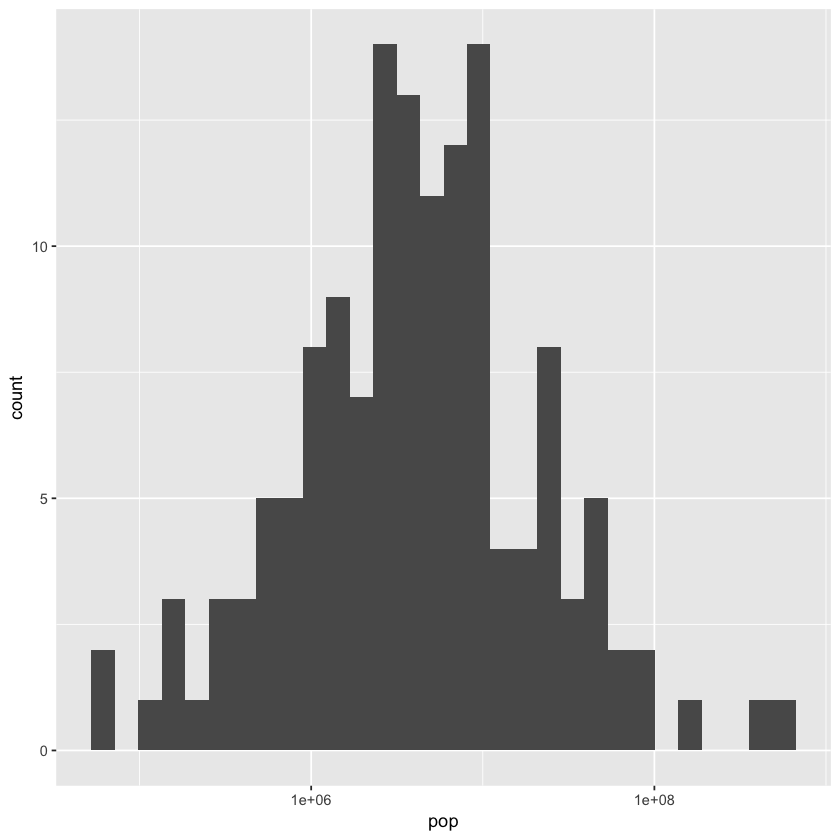

In [14]:
#Visualising population with x-axis on log scale
gapminder_1952 <- gapminder %>%
  filter(year == 1952)

# Create a histogram of population (pop), with x on a log scale
ggplot(gapminder_1952, aes(x=pop)) + geom_histogram(bins=30) + scale_x_log10()

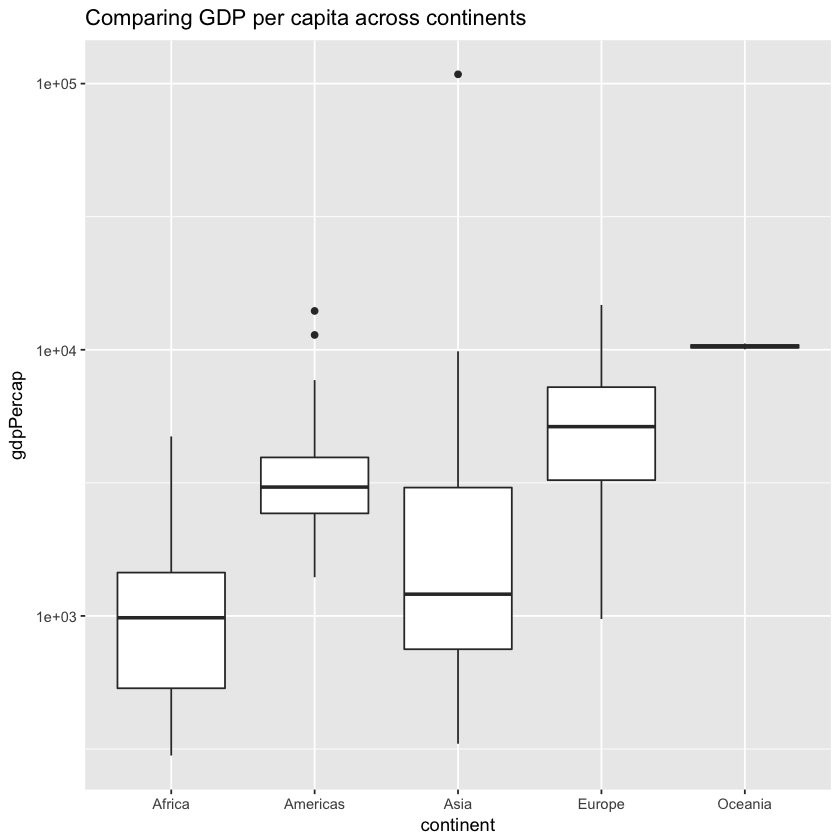

In [15]:
#Comparing GDP per capita across continents
ggplot(gapminder_1952, aes(x=continent, y=gdpPercap)) + ggtitle('Comparing GDP per capita across continents') + geom_boxplot() + scale_y_log10()